In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_3_forecast/_5_prophet/_data_compet")


In [3]:
df = pd.read_csv('sales_1.csv', sep=',')
df.head()

,num,date,shop_id,owner,number_of_counters,goods_type,total_items_sold
0,0,2146-01-01,0,Рейдеры,4,Съедобный хлам,6.0
1,1,2146-01-01,0,Рейдеры,4,Хлам,26.0
2,2,2146-01-01,0,Рейдеры,4,Бензак,10537.0
3,3,2146-01-01,1,Рейдеры,5,Съедобный хлам,17.0
4,4,2146-01-01,1,Рейдеры,5,Хлам,9.0


In [4]:
#   df['shop_id'].unique()

In [5]:
df_1 = df[(df['goods_type'] == 'Бензак') & (df['shop_id'] == 0) ]
df_1.head()

,num,date,shop_id,owner,number_of_counters,goods_type,total_items_sold
2,2,2146-01-01,0,Рейдеры,4,Бензак,10537.0
7045,7045,2146-01-02,0,Рейдеры,4,Бензак,14107.0
14213,14213,2146-01-03,0,Рейдеры,4,Бензак,16092.0
21351,21351,2146-01-04,0,Рейдеры,4,Бензак,18050.0
28391,28391,2146-01-05,0,Рейдеры,4,Бензак,18456.0


In [6]:
df_2 = df_1[['date','total_items_sold']]
df_2.head()

,date,total_items_sold
2,2146-01-01,10537.0
7045,2146-01-02,14107.0
14213,2146-01-03,16092.0
21351,2146-01-04,18050.0
28391,2146-01-05,18456.0


In [7]:
df_2.columns = ['ds', 'y']

df_2["ds"] = pd.to_datetime(df_2["ds"])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#  Почему на копии все работает?

df_3 = df_2.copy()
df_3.columns = ['ds', 'y']

df_3["ds"] = pd.to_datetime(df_3["ds"])

In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 2 to 5074261
Data columns (total 2 columns):
ds    730 non-null datetime64[ns]
y     730 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.1 KB


In [10]:
df_3.head()

,ds,y
2,2146-01-01,10537.0
7045,2146-01-02,14107.0
14213,2146-01-03,16092.0
21351,2146-01-04,18050.0
28391,2146-01-05,18456.0


In [11]:
df_3.tail()

,ds,y
5046133,2147-12-27,21437.0
5053132,2147-12-28,19263.0
5060196,2147-12-29,16994.0
5067189,2147-12-30,19508.0
5074261,2147-12-31,19828.0


In [13]:
df_3.index = range(730)

#   df_3 = df_3.reset_index()

In [14]:
df_3.head()

,ds,y
0,2146-01-01,10537.0
1,2146-01-02,14107.0
2,2146-01-03,16092.0
3,2146-01-04,18050.0
4,2146-01-05,18456.0


In [15]:
df_3.tail()

,ds,y
725,2147-12-27,21437.0
726,2147-12-28,19263.0
727,2147-12-29,16994.0
728,2147-12-30,19508.0
729,2147-12-31,19828.0


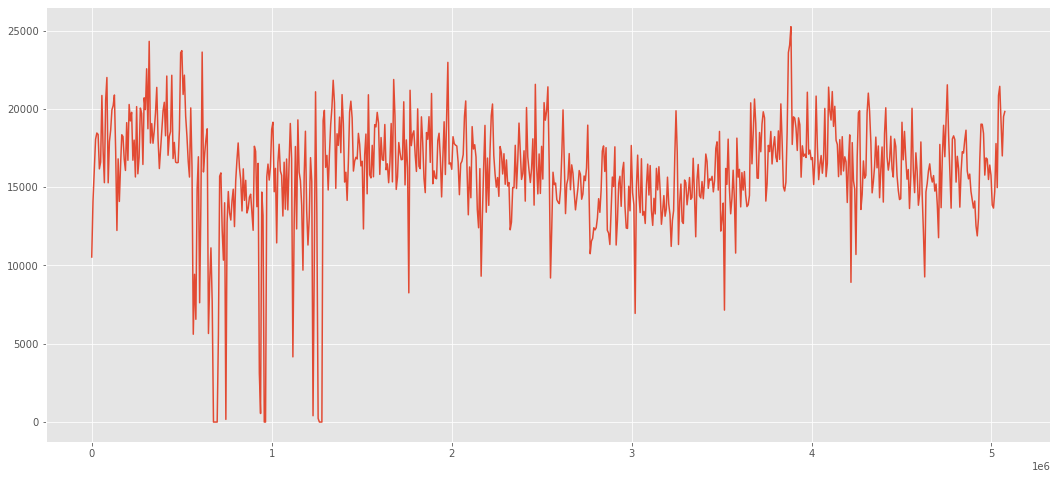

In [32]:
plt.figure(figsize=(18, 8))
plt.plot(df_1['total_items_sold'])

In [17]:
import seaborn as sns

palette = sns.color_palette("tab10") # Цвета для графиков



C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ds', ylabel='y'>

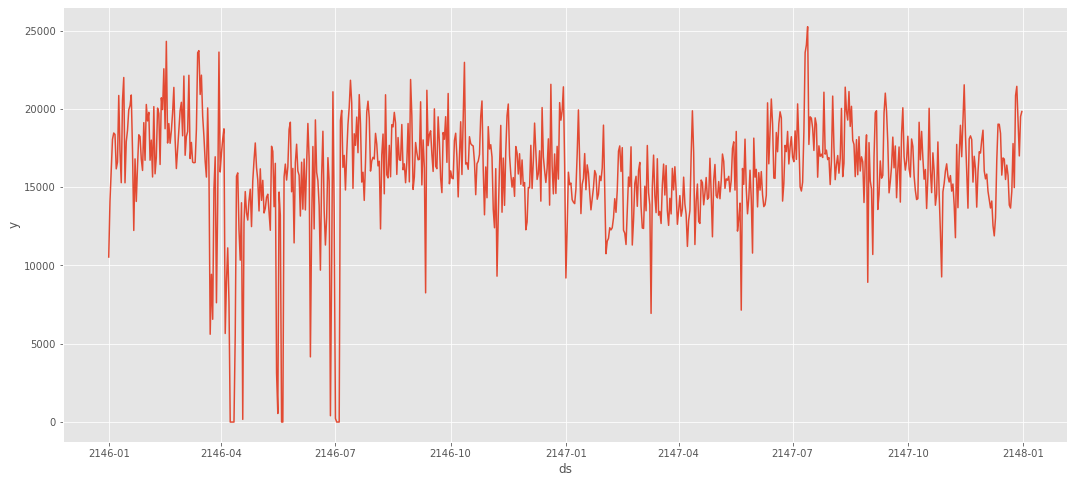

In [18]:
#  Не знаю, почему график такой же...
plt.figure(figsize=(18, 8))
sns.lineplot(x = 'ds', 
             y = 'y',
             data = df_3,
             palette = palette)

Для установки fbprophet с помощью conda выполните одну из команд:

conda install -c conda-forge fbprophet  <br>
conda install -c conda-forge/label/cf201901 fbprophet  <br>
conda install -c conda-forge/label/cf202003 fbprophet  <br>

https://anaconda.org/conda-forge/fbprophet

In [19]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [46]:
#  from fbprophet import ...

In [ ]:
#  ?Prophet

In [20]:
horizon_ = 60

In [21]:
m = Prophet()
m.fit(df_3)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\USER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [22]:
forecast_ = m.make_future_dataframe(periods=horizon_)
forecast_.tail()


,ds
785,2148-02-25
786,2148-02-26
787,2148-02-27
788,2148-02-28
789,2148-02-29


In [23]:
forecast_1 = m.predict(forecast_)
forecast_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
785,2148-02-25,16695.022577,12353.432988,20764.523449
786,2148-02-26,16370.639138,11900.655263,20704.200964
787,2148-02-27,17803.052893,13585.285919,21828.239298
788,2148-02-28,18879.926776,14908.690689,23127.398636
789,2148-02-29,17238.693472,12960.450358,21594.517993


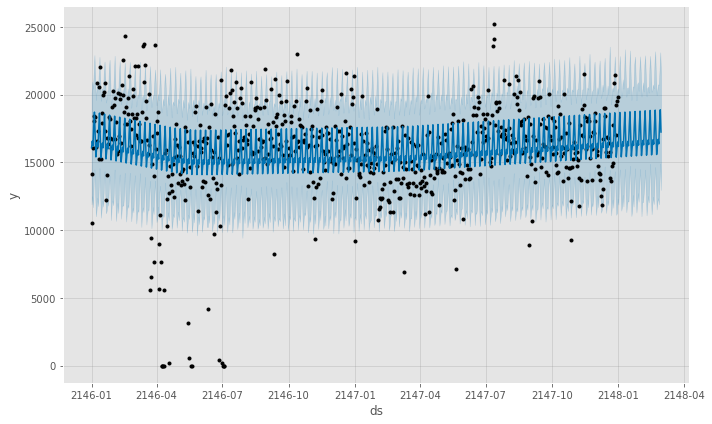

In [24]:
fig1 = m.plot(forecast_1)

In [25]:
m_2 = Prophet(growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality= True,
    weekly_seasonality= True,
    daily_seasonality=False,
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None)





m_2.fit(df_3)

C:\Users\USER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [26]:
forecast_2 = m_2.make_future_dataframe(periods=horizon_)
forecast_2.tail()


,ds
785,2148-02-25
786,2148-02-26
787,2148-02-27
788,2148-02-28
789,2148-02-29


In [27]:
forecast_3 = m_2.predict(forecast_2)
forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
785,2148-02-25,16358.374304,12550.179475,20029.657313
786,2148-02-26,16013.639554,11867.040367,19674.018466
787,2148-02-27,17429.526730,13835.281470,21122.792936
788,2148-02-28,18497.642073,14774.256509,22475.914377
789,2148-02-29,16855.956912,13042.400922,20587.942597


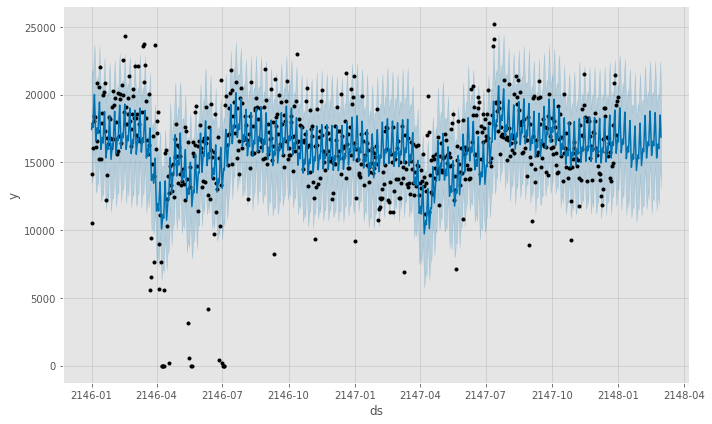

In [28]:
fig1 = m_2.plot(forecast_3)

In [29]:
forecast_3.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [30]:
forecast_3[['trend_lower', 'trend_upper']]

,trend_lower,trend_upper
0,17341.628705,17341.628705
1,17330.714712,17330.714712
2,17319.800720,17319.800720
3,17308.886728,17308.886728
4,17297.972736,17297.972736
...,...,...
785,16303.572239,16374.052641
786,16303.526594,16376.405377
787,16303.892691,16379.214508
788,16303.854723,16381.700262


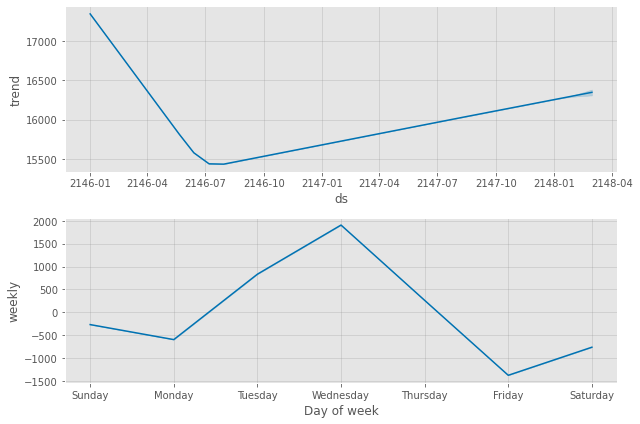

In [36]:
fig2 = m.plot_components(forecast_3)

In [ ]:
from fbprophet import Prophet

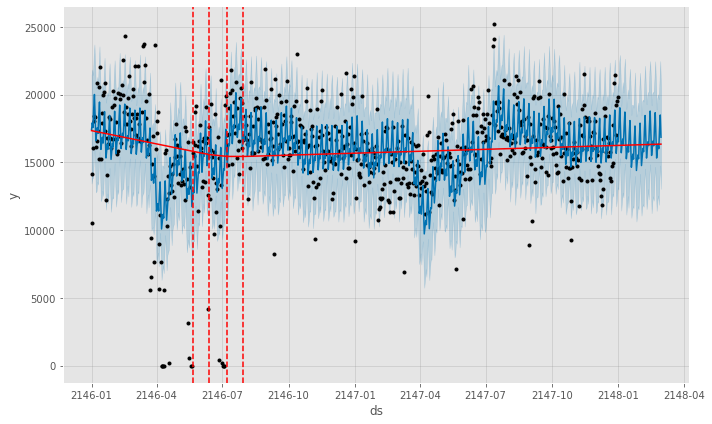

In [33]:
# Python
from fbprophet.plot import add_changepoints_to_plot

fig = m_2.plot(forecast_3)
a = add_changepoints_to_plot(fig.gca(), m_2, forecast_3)
